In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
w, b = 1.8, 2.5

In [3]:
np.random.seed(0)
x = np.random.rand(100) * 4 - 2
noise = np.random.randn(100)/3
y = w * x + b + noise

In [4]:
x = x.reshape(-1,1) 
x.shape, y.shape 

((100, 1), (100,))

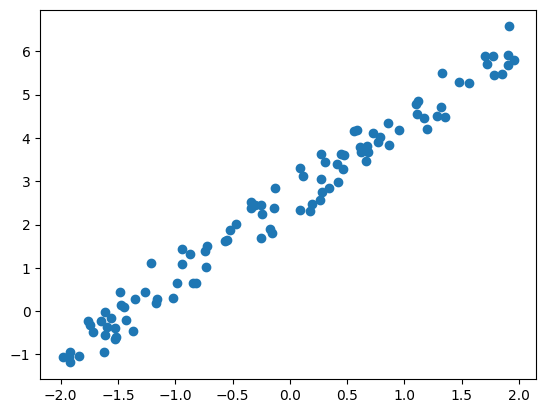

In [5]:
plt.scatter(x,y)

In [6]:
from sklearn.neural_network import MLPRegressor

In [7]:
reg = MLPRegressor(
    hidden_layer_sizes=(1,),
    activation='identity',    #不加激活函数
    learning_rate_init=0.01,
    random_state=233
)

In [8]:
reg.fit(x,y)

MLPRegressor(activation='identity', hidden_layer_sizes=(1,),
             learning_rate_init=0.01, random_state=233)

In [9]:
reg.score(x, y)

0.974674992013746

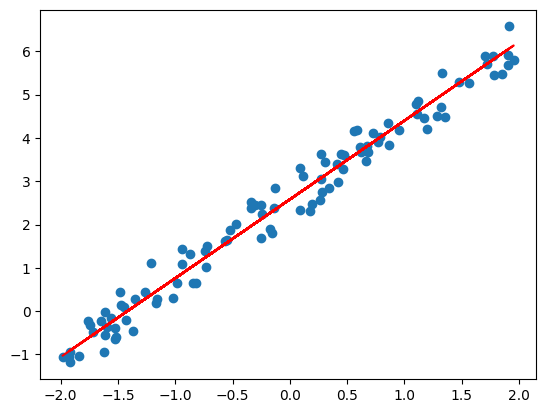

In [10]:
y_pred = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')

In [11]:
w1, w2 = np.array(reg.coefs_).reshape(-1)
b1, b2 = np.array(reg.intercepts_).reshape(-1)

In [12]:
w1, w2, b1, b2

(-2.0230772887975506,
 -0.8994147672147477,
 0.20843202333485145,
 2.7673419504355397)

In [13]:
w1 * w2, w2 * b1 + b2

(1.8195855887612917, 2.5798751106877256)

### 手动实现反向传播权重更新

In [14]:
w1, b1, w2, b2 = np.random.randn(4)

In [15]:
w1, b1, w2, b2

(-0.35399391125348395,
 -1.3749512934180188,
 -0.6436184028328905,
 -2.2234031522244266)

In [16]:
y_real = y.reshape(-1,1)

In [17]:
lr = 0.01

In [18]:
for i in range(100):
    y1 = w1 * x + b1
    y_pred = w2 * y1 + b2
    loss = ((y_real-y_pred) ** 2) / 2 
    dy = y_pred - y_real
    dy1 = dy * w2
    dw1 = np.mean(x*dy1)
    dw2 = np.mean(y1*dy)
    db1 = np.mean(dy1)
    db2 = np.mean(dy)

    w1 -= lr*dw1
    w2 -= lr*dw2 
    b1 -= lr*db1
    b2 -= lr*db2

w1, w2, b1, b2

(-0.9177449267250191,
 -1.9504364639229044,
 -2.129914286339166,
 -1.5893718385879363)

In [19]:
y_pred = w2 * (w1 * x + b1) + b2

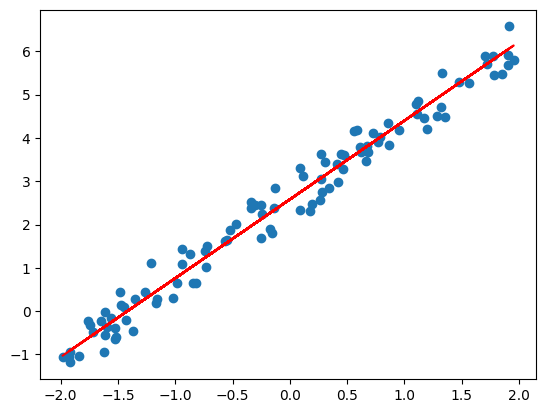

In [20]:
y_pred = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')

In [21]:
w1 * w2, w2 * b1 + b2

(1.7900031696647312, 2.564890650518303)